# Project 5 - Exploration Data Analysis and Visualization

Exploratory data analysis (EDA) is an approach for summarizing and visualizing the important characteristics of a data set. It gives us more understanding of the data’s underlying structure and variables before feature engineering, formal modeling, model tuning, and other data analysis techniques. In this mini project, you will be introduced to some ways to explore data efficiently with different packages so that you can develop intuition about your data set:
* Import and briefly check data with python data manipulation tools Pandas
* Get basic description of data, descriptive statistics, checking rows and columns.
* Time series analysis
* Simple predictive modeling
* Discover patterns in data by visualizing data with python data visualization packages sucha as Matplotlib, and Seaborn, or by using functions to compute the correlation between features.

### Dataset
* The data set we are going to be using is from a language learning application on smartphones. It contains user info, lexeme info and session info. We have already joined them into one single table for our analysis purpose.

### General Philosophy and Steps for this project
 - Data preparation: load all needed dependencies and packages, setup plot style
 - Data Import: load data to pandas dataframe and check
 - Post questions: propose hypothesis based on your intuition
 - Visualization: Test you intuition and hypothesis using python visualization packages, such as Matplotlib.

## Duolingo Exploratory Data Analysis

In [1]:
# Import all dependencies we need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import datetime as dt
import seaborn as sns
%matplotlib inline 

In [2]:
# avaliable plot styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Import data

In [3]:
# Since this dataset is 1.3G and we only take a look of first 1000000 rows #
pro_5 = pd.read_csv('learning_traces.13m.csv', nrows=1000000)

In [4]:
# Print out the head of our dataset
pro_5.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [5]:
# Check the infomation of our data, such as columns, data type #
pro_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   p_recall           1000000 non-null  float64
 1   timestamp          1000000 non-null  int64  
 2   delta              1000000 non-null  int64  
 3   user_id            1000000 non-null  object 
 4   learning_language  1000000 non-null  object 
 5   ui_language        1000000 non-null  object 
 6   lexeme_id          1000000 non-null  object 
 7   lexeme_string      1000000 non-null  object 
 8   history_seen       1000000 non-null  int64  
 9   history_correct    1000000 non-null  int64  
 10  session_seen       1000000 non-null  int64  
 11  session_correct    1000000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ MB


In [6]:
pro_5.shape

(1000000, 12)

In [7]:
pro_5.isnull().sum().sum()

0

In [8]:
pro_5.dtypes

p_recall             float64
timestamp              int64
delta                  int64
user_id               object
learning_language     object
ui_language           object
lexeme_id             object
lexeme_string         object
history_seen           int64
history_correct        int64
session_seen           int64
session_correct        int64
dtype: object

#### Please try to answer the following questions when you follow the data visualization procedures below:

 - How many users are there from every country?
 - How many different languages are being studied
 - Are there differences between users from different coutries
 - Time series analysis 
     - temporal behaviour of users
     - when do people study?
     - how often do they study
     - timestamp
 - Predictive modelling
     - corellations of p_recall with various features  

### Numerical data

In [9]:
# list all types that only take numerical ones
print(list(set(pro_5.dtypes.tolist())))
data_types = pro_5.dtypes  
num_cols = list(data_types[data_types=='int64'].index) + list(data_types[data_types=='float64'].index)
print ( "Numerical features:", num_cols)

[dtype('int64'), dtype('O'), dtype('float64')]
Numerical features: ['timestamp', 'delta', 'history_seen', 'history_correct', 'session_seen', 'session_correct', 'p_recall']


#### 1. Create a dataframe that only takes numerical data and show the head

In [10]:
# hint: df.select_dtypes() which you could select numerical data types
pro_5_numcol = pd.DataFrame(pro_5, columns = pro_5.select_dtypes(include =['int','float']).columns)
pro_5_numcol.head(10)

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
0,1.00,1362076081,27649635,6,4,2,2
1,0.50,1362076081,27649635,4,4,2,1
2,1.00,1362076081,27649635,5,4,1,1
3,0.50,1362076081,27649635,6,5,2,1
4,1.00,1362076081,27649635,4,4,1,1
5,1.00,1362076081,27649635,4,3,1,1
6,1.00,1362076081,27649635,4,4,1,1
7,1.00,1362082032,444407,3,3,1,1
8,1.00,1362082044,5963,8,6,6,6
9,0.75,1362082044,5963,6,5,4,3


#### 2. Draw histgrams to show the distributions of all the numerical data from the dataframe we just created.

array([[<AxesSubplot:title={'center':'p_recall'}>,
        <AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'delta'}>],
       [<AxesSubplot:title={'center':'history_seen'}>,
        <AxesSubplot:title={'center':'history_correct'}>,
        <AxesSubplot:title={'center':'session_seen'}>],
       [<AxesSubplot:title={'center':'session_correct'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

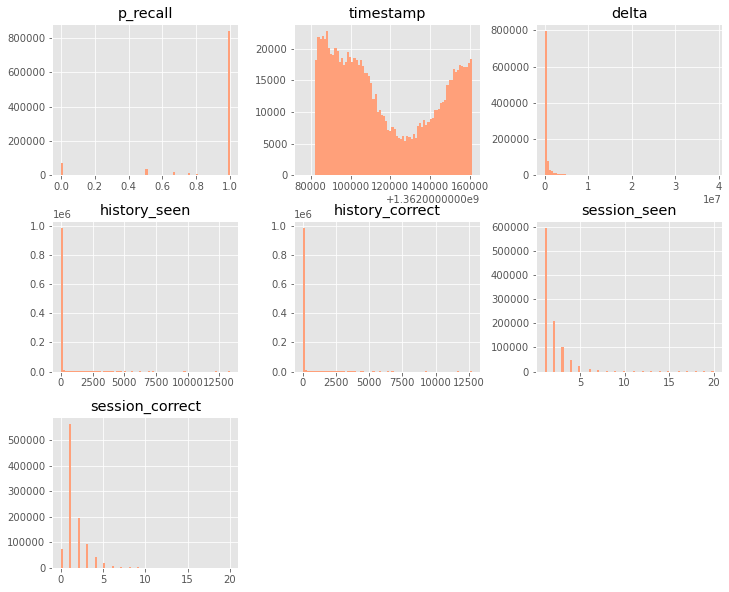

In [11]:
pro_5_numcol.hist(figsize=(12,10),alpha = 1,color = '#FFA07A',bins = 80)
# delta,history_seen,history_correct look like extremly imbalance data,
#1*10^6 cases with one entry data '0-1' round 1*10^6/1.3*10^6 = 0.77

### Feature to feature relationship

Trying to plot all the numerical features in a pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

#### 3. Compute pairwise correlation matrix of numerical columns and draw a heatmap using seaborn plot

hint: the heatmap may look like this
![image.png](attachment:image.png)

In [12]:
# hint：corr(), sns.heatmap()
corrmat = pro_5_numcol.corr().abs()
corrmat

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
p_recall,1.000000,0.000311,0.029508,0.024895,0.015179,0.041875,0.307326
timestamp,0.000311,1.000000,0.001258,0.003677,0.001993,0.011619,0.010839
delta,0.029508,0.001258,1.000000,0.029574,0.029490,0.001349,0.010052
history_seen,0.024895,0.003677,0.029574,1.000000,0.986264,0.005670,0.002824
history_correct,0.015179,0.001993,0.029490,0.986264,1.000000,0.006443,0.001176
session_seen,0.041875,0.011619,0.001349,0.005670,0.006443,1.000000,0.951276
session_correct,0.307326,0.010839,0.010052,0.002824,0.001176,0.951276,1.000000


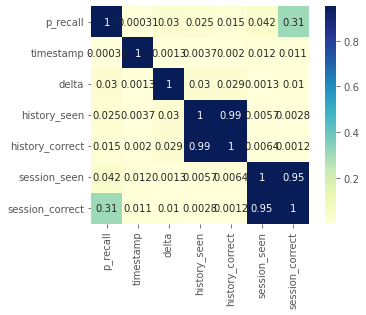

In [13]:
sns.heatmap(corrmat, vmax=.95, square=True,annot=True, cmap="YlGnBu")
plt.show()
#session_seen and session_correct has strong correlation
#history_seen and history_correct has strong correlation

### Categorical data - Countries

#### 1. What are user interface languages? 

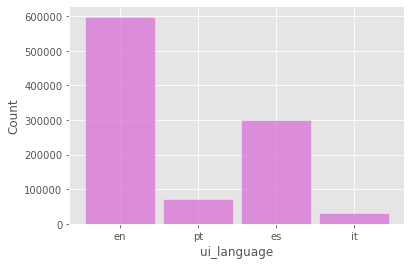

In [14]:
#pro_5['ui_language'].hist(alpha = 1,color = '#87CEFA',grid = True)
#user interface language include 'en','pt','es','it', 4 types of language.
sns.histplot(data=pro_5['ui_language'],color = 'orchid',shrink=.9)
plt.show()

#### 2. Do a value_counts() to see how popular each interface language is

In [15]:
pro_5['ui_language'].value_counts()

en    598123
es    298705
pt     72876
it     30296
Name: ui_language, dtype: int64

#### 3. Draw a pie plot to visualize user interface language distribution with percentage on it

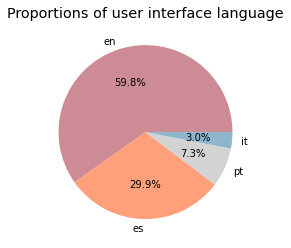

In [16]:
# hint: showing percentage, add autopct parameter
# Type you answer below 
#create pie chart
colors = ['#CD8C95','#FFA07A','#D3D3D3','#8DB6CD']
labels= pro_5['ui_language'].value_counts().index
plt.pie(pro_5['ui_language'].value_counts(), labels = labels, colors=colors, autopct='%1.1f%%')
plt.title("Proportions of user interface language")
#draw circle
#centre_circle = plt.Circle((0,0),0.70,fc='white')
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
plt.show()

#### 4. Draw a pie plot of languages that individuals are learnging

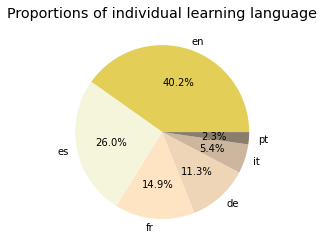

In [17]:
# Type you answer below 
colors = ['#E3CF57','#F5F5DC','#FFE4C4','#EED5B7','#CCB79E','#8B7D6B']
labels= pro_5['learning_language'].value_counts().index
plt.pie(pro_5['learning_language'].value_counts(), labels = labels, colors=colors, autopct='%1.1f%%')
plt.title("Proportions of individual learning language")
#draw circle
#centre_circle = plt.Circle((0,0),0.70,fc='white')
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
plt.show()

#### 5. Pie plot to visualize what languages being learned by people whose interface language is English

Text(0.5, 1.0, 'Proportions of individual learning language by people using english as interface language')

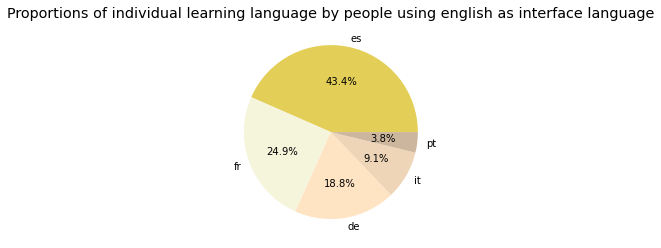

In [18]:
# you want to show the learning language based on people whose interface language is English
# firstly create subdataframe interface language is english
ui_language_en = pro_5[pro_5.ui_language == 'en']
ui_language_en.shape
#pie plot using new dataframe
colors = ['#E3CF57','#F5F5DC','#FFE4C4','#EED5B7','#CCB79E','#8B7D6B']
labels = ui_language_en['learning_language'].value_counts().index
plt.pie(ui_language_en['learning_language'].value_counts(),labels = labels, colors=colors, autopct='%1.1f%%')
plt.title("Proportions of individual learning language by people using english as interface language")

#### 6. Let's see what languages being learned by people whose interface languages are English, Spanish, Italian, and Potuguese by subplot four pie plots

Text(0.5, 1.0, 'en')

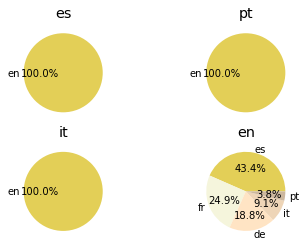

In [19]:
# Type you answer below 
# 应该有循环的code解决这个问题
colors = ['#E3CF57','#F5F5DC','#FFE4C4','#EED5B7','#CCB79E','#8B7D6B']
fig = plt.figure()
ax1 = plt.subplot2grid((2,2),(0,0))
ui_language_es = pro_5[pro_5.ui_language == 'es']
labels = ui_language_es['learning_language'].value_counts().index
plt.pie(ui_language_es['learning_language'].value_counts(),labels = labels, colors=colors, autopct='%1.1f%%')
plt.title('es')
ax1 = plt.subplot2grid((2,2), (0, 1))
ui_language_pt = pro_5[pro_5.ui_language == 'pt']
labels = ui_language_pt['learning_language'].value_counts().index
plt.pie(ui_language_pt['learning_language'].value_counts(),labels = labels, colors=colors, autopct='%1.1f%%')
plt.title('pt')
ax1 = plt.subplot2grid((2,2), (1, 0))
ui_language_it = pro_5[pro_5.ui_language == 'it']
labels = ui_language_it['learning_language'].value_counts().index
plt.pie(ui_language_it['learning_language'].value_counts(),labels = labels, colors=colors, autopct='%1.1f%%')
plt.title('it')
ax1 = plt.subplot2grid((2,2), (1, 1))
ui_language_en = pro_5[pro_5.ui_language == 'en']
labels = ui_language_en['learning_language'].value_counts().index
plt.pie(ui_language_en['learning_language'].value_counts(),labels = labels, colors=colors, autopct='%1.1f%%')
plt.title('en')

ValueError: 'label' must be of length 'x'

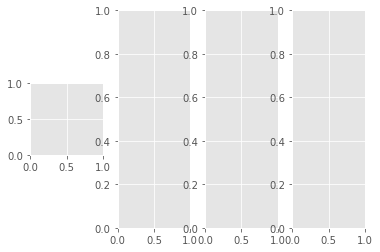

In [20]:
#为什么这种方法不可以？
# labels = pro_5['ui_language'].value_counts().index
# fig, axs = plt.subplots(1,4)
# axs[0].pie(pro_5[pro_5.ui_language == 'en'].groupby(["learning_language"]).size(), labels=labels, autopct='%1.1f%%')
# axs[1].pie(pro_5[pro_5.ui_language == 'es'].groupby(["learning_language"]).size(), labels=labels, autopct='%1.1f%%')
# axs[2].pie(pro_5[pro_5.ui_language == 'pt'].groupby(["learning_language"]).size(), labels=labels, autopct='%1.1f%%')
# axs[3].pie(pro_5[pro_5.ui_language == 'it'].groupby(["learning_language"]).size(), labels=labels, autopct='%1.1f%%')
# plt.show()

#### hint: result plot would look like this
![image.png](attachment:image.png)

## Users Activity patterns

#### 1. Let's see users activity in session by doing a value counts and do a summary statistics

In [21]:
# hint: summary statistics use describe() function 
# Type you answer below
pro_5_numcol.describe()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.894955,1.362118e+09,6.145372e+05,21.659757,19.105828,1.788163,1.615618
std,0.273827,2.511090e+04,1.997129e+06,120.081596,103.611832,1.333740,1.294637
min,0.000000,1.362076e+09,1.000000e+00,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.362095e+09,5.040000e+02,3.000000,3.000000,1.000000,1.000000
50%,1.000000,1.362110e+09,7.157600e+04,7.000000,6.000000,1.000000,1.000000
75%,1.000000,1.362143e+09,3.431455e+05,15.000000,14.000000,2.000000,2.000000
max,1.000000,1.362161e+09,3.877671e+07,13348.000000,12728.000000,20.000000,20.000000


In [22]:
pro_5_numcol['session_seen'].value_counts()

1     596858
2     208146
3     101697
4      48155
5      23301
6      10581
7       4763
8       2410
9       1443
10       989
11       487
12       296
13       238
16       224
14       204
15       135
19        25
17        20
18        15
20        13
Name: session_seen, dtype: int64

In [23]:
pro_5_numcol['session_correct'].value_counts()

1     562484
2     195265
3      92502
0      72176
4      41912
5      18765
6       8236
7       3657
8       1891
9       1178
10       654
11       415
12       291
13       207
14       141
15        99
16        76
17        19
19        16
18        15
20         1
Name: session_correct, dtype: int64

In [24]:
pro_5['user_id'].value_counts()

u:ia1J    2041
u:bcH_    1531
u:eMgB    1233
u:wpZ     1230
u:gp3v    1037
          ... 
u:c179       1
u:hDND       1
u:hSOs       1
u:iaOD       1
u:cKww       1
Name: user_id, Length: 20204, dtype: int64

#### 2. Compute the duration of dataset

In [51]:
# hint: maximum timestamp minus minimum timestamp
# Type you answer below 
duration = (pro_5_numcol['timestamp'].max()-pro_5_numcol['timestamp'].min())/3600.00
duration

23.500555555555554

## Boxplots

#### 3. Compare activity levels for people with different 4 user interface languages by drawing boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9bbd669d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9bbd6699d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9bbd669a90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9bbd6778b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9bbff0e250>,
 'means': []}

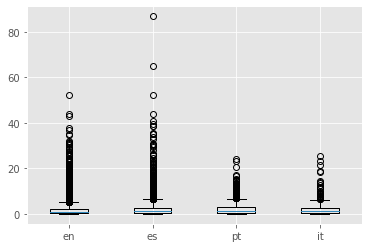

In [52]:
# hint: df[df.ui_language == 'en']['user_id'].value_counts()/duration
# Type you answer below 
en = pro_5[pro_5.ui_language == 'en']['user_id'].value_counts()/duration
es = pro_5[pro_5.ui_language == 'es']['user_id'].value_counts()/duration
pt = pro_5[pro_5.ui_language == 'pt']['user_id'].value_counts()/duration
it = pro_5[pro_5.ui_language == 'it']['user_id'].value_counts()/duration
plt.boxplot([en,es,pt,it],labels =['en','es','pt','it'])

#### 4. Do the same thing but setting ylim to 0-10, which plot would be seen more clearly

(0.0, 10.0)

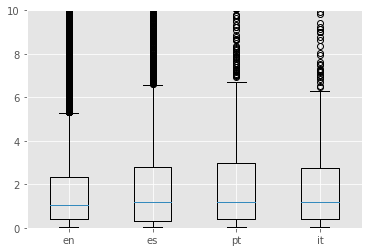

In [68]:
# Type you answer below 
plt.boxplot([en,es,pt,it],labels =['en','es','pt','it'])
plt.ylim(0,10)

####  5. Another way to zoom in instead of setting ylim is to take a log scale on the boxplot

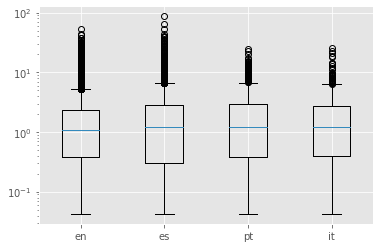

In [54]:
# hint: log scale on y
# Type you answer below 
plt.boxplot([en,es,pt,it],labels =['en','es','pt','it'])
plt.yscale('log')

## Regression and predictive tasks

In [33]:
pro_5.head(5)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


#### 1. Scatter plot the relation between session_seen and p_recall

<AxesSubplot:xlabel='session_seen', ylabel='p_recall'>

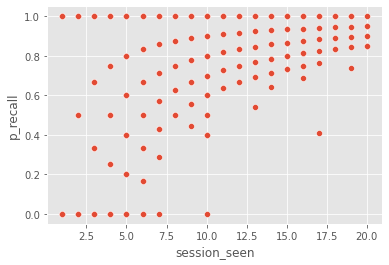

In [34]:
# Type you answer below 
sns.scatterplot(data=pro_5, x="session_seen", y="p_recall")

#### 2. Scatter plot the same distribution with log scale. 

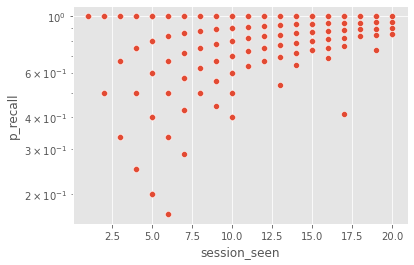

In [35]:
# Type you answer below 
sns.scatterplot(data=pro_5, x="session_seen", y="p_recall")
plt.yscale('log')

#### 3. Goupby session_seen and take aveage on it as x, and scatter plot relation with p_recall as y

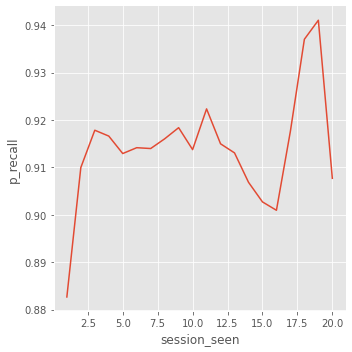

In [36]:
# hint: use groupby(), and mean() functions
# Type you answer below 
pro_5_t = pro_5.groupby(['session_seen']).mean()
pro_5_t.head(10)
#sns.scatterplot(data=pro_5, x=pro_5, y="p_recall")
sns.relplot(kind='line', data=pro_5_t, x='session_seen', y="p_recall")

#### 4. Goupby history_seen and take aveage on it as x, and scatter plot relation with p_recall as y

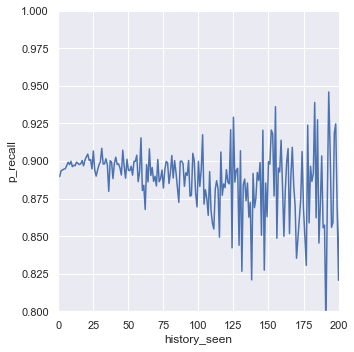

In [107]:
# Type you answer below 
sns.set(rc={"figure.figsize":(5, 3)})
pro_5_t2 = pro_5.groupby(['history_seen']).mean()
pro_5_t2.head(10)
sns.relplot(kind='line', data=pro_5_t2, x='history_seen', y="p_recall")
# plt方法
#plt.plot(user_act.groupby('history_seen').mean()['p_recall'])
plt.xlim(0,200)
plt.ylim(0.8,1)
plt.xlabel('history_seen')
plt.ylabel('p_recall')
plt.show()

#### 5. Scatter plot the relation history_seen and p_recall when session_seen is greater than 5

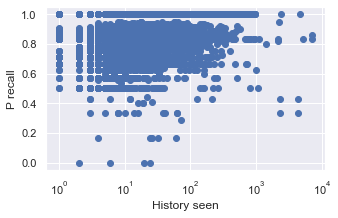

In [108]:
# Type you answer below 
pro_5_t3 = pro_5[pro_5.session_seen >5]
#sns.scatterplot(data=pro_5_t3, x="history_seen", y="p_recall")
plt.scatter(pro_5_t3['history_seen'],pro_5_t3['p_recall'])
plt.xlabel('History seen')
plt.ylabel('P recall')
plt.xscale('log')
plt.show()

#### 6. Hexbin plot the relation between history_seen and p_recal with log scale

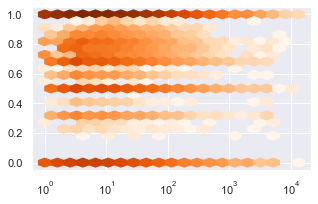

In [127]:
# hint: hexbin()
# Type you answer below 
plt.hexbin(pro_5["history_seen"],pro_5["p_recall"],gridsize = 20, xscale ='log',bins = 'log',cmap="Oranges")
plt.show() 

#### 7. Create a dataframe with user_id and user_activity based on user_id index

In [40]:
# create an empty dataframe and set index to user_id
# Type you answer below 
# reverse 'value_counts()'频数表转为‘dataframe’
pro_5_t4 = pro_5['user_id'].value_counts().rename_axis('user_id').reset_index(name ='user_activity')
#pro_5_t4['user_id'] = pro_5.user_id
#pro_5_t4['user_activity'] = pro_5.entries # entries 不work
pro_5_t4.head(6)

,user_id,user_activity
0,u:ia1J,2041
1,u:bcH_,1531
2,u:eMgB,1233
3,u:wpZ,1230
4,u:gp3v,1037
5,u:hCqJ,1033


In [41]:
pro_5_t4.iloc[-10:,:]

,user_id,user_activity
20194,u:hDzc,1
20195,u:hRKr,1
20196,u:eY-r,1
20197,u:hVVH,1
20198,u:izs5,1
20199,u:c179,1
20200,u:hDND,1
20201,u:hSOs,1
20202,u:iaOD,1
20203,u:cKww,1


In [42]:
pro_5_t4.shape

(20204, 2)

#### 8. Merge dataframe a onto original dataframe

In [66]:
#hint: merge(), pay attention to how to merge(inner, outer....)
#Type you answer below 
#pro_5_t5 = pd.concat([pro_5,pro_5_t4],axis =1, join='inner')
#pro_5_t5.info()
#pro_5_t5.head()
pro_5_t5 = pd.merge(pro_5,pro_5_t4,on='user_id',how='inner',indicator = True)
pro_5_t5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   p_recall           1000000 non-null  float64 
 1   timestamp          1000000 non-null  int64   
 2   delta              1000000 non-null  int64   
 3   user_id            1000000 non-null  object  
 4   learning_language  1000000 non-null  object  
 5   ui_language        1000000 non-null  object  
 6   lexeme_id          1000000 non-null  object  
 7   lexeme_string      1000000 non-null  object  
 8   history_seen       1000000 non-null  int64   
 9   history_correct    1000000 non-null  int64   
 10  session_seen       1000000 non-null  int64   
 11  session_correct    1000000 non-null  int64   
 12  user_activity      1000000 non-null  int64   
 13  _merge             1000000 non-null  category
dtypes: category(1), float64(1), int64(7), object(5)
memory usage: 107.8

In [67]:
pro_5_t5.sample(5,random_state = 9)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,user_activity,_merge
835603,1.0,1362144823,2876694,u:ePPw,en,es,1e7dcbc00315ba13f388fe7ed272db21,swim/swim<vblex><inf>,6,6,1,1,329,both
686248,1.0,1362120261,13503154,u:bWbZ,fr,en,0ba76e542975db89c0290ba705f4fe9d,ses/son<det><pos><mf><pl>,9,9,2,2,133,both
55040,1.0,1362083721,67867,u:iCW9,en,es,6d67c94cb5df94bae1d8f5f101db72a7,dress/dress<n><sg>,2,2,2,2,15,both
777193,0.0,1362155785,4805,u:gL_n,en,it,1e1f8d730c4ba99ad2873a7608324cf6,my/my<det><pos><sp>,250,113,1,0,600,both
633508,1.0,1362112696,77497,u:duul,fr,en,dd319e2880bfb05dfc4bb230a6cd2e38,neuf/neuf<num><mf><sp>,4,4,2,2,232,both


#### 9. Get summary statistics of p_recall when user_activity is less than 8 and greater than 59 respectively

In [45]:
# Type you answer below 
pro_5_t5[pro_5_t5['user_activity'] < 8]['p_recall'].describe()

count    21922.000000
mean         0.902981
std          0.192375
min          0.000000
25%          0.833333
50%          1.000000
75%          1.000000
max          1.000000
Name: p_recall, dtype: float64

In [46]:
pro_5_t5[pro_5_t5['user_activity']>59]['p_recall'].describe()

count    691724.000000
mean          0.894502
std           0.281582
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: p_recall, dtype: float64

#### 10. Hexbin plot the relation between delta and p_recall with log scale

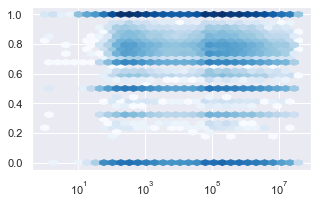

In [126]:
# Type you answer below 
x= pro_5["delta"]
y= pro_5["p_recall"]
plt.hexbin(x, y,gridsize =30,bins = 'log',xscale = 'log',cmap="Blues")
plt.show() 

In [48]:
# hint: hexbin plot would look like this 
![image.png](attachment:image.png)

/bin/bash: -c: line 0: syntax error near unexpected token `attachment:image.png'
/bin/bash: -c: line 0: `[image.png](attachment:image.png)'


#### 11. Scatter plot relation between user_activity and delta

<AxesSubplot:xlabel='user_activity', ylabel='delta'>

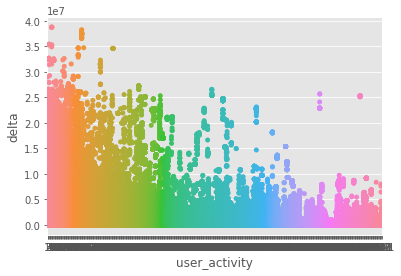

In [50]:
# Type you answer below 
#sns.scatterplot(data=pro_5_t5, x="user_activity", y="delta")
sns.stripplot(data=pro_5_t5, x="user_activity", y="delta")
#sns.swarmplot(data=pro_5_t5, x="user_activity", y="delta")

#### 12. Hexbin plot the relation between user_activity and delta with log scale

## Temporal patterns and Time Series

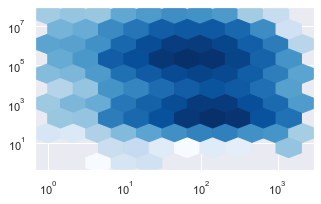

In [129]:
# Type you answer below 
x= pro_5_t5["user_activity"]
y= pro_5_t5["delta"]
plt.hexbin(x, y,gridsize =10,bins = 'log',yscale='log',xscale = 'log',cmap="Blues")
plt.show() 

#### 1. Plot the general all users activity pattern to see what time people are pretty active during a day

In [130]:
np.round((pro_5.timestamp - pro_5.timestamp.min())/60.0,0).value_counts()

146.0    1624
436.0    1557
211.0    1551
199.0    1528
176.0    1507
         ... 
105.0       7
0.0         7
104.0       6
102.0       4
101.0       1
Name: timestamp, Length: 1311, dtype: int64

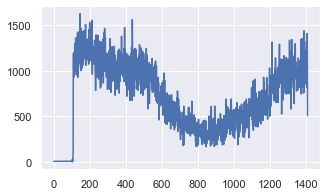

In [131]:
plt.plot(np.round((pro_5.timestamp - pro_5.timestamp.min())/60.0,0).value_counts().sort_index())

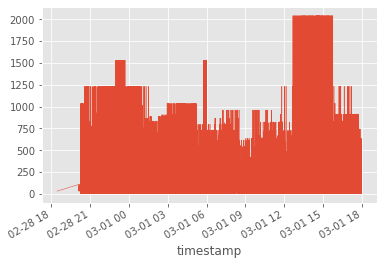

In [65]:
# Type you answer below 
#sns.set(rc={'figure.figsize':(11,4)})
pro_5_t5['user_activity'].plot(linewidth=0.5); 
# user activity in each day time, comparing to other times
#you can see 03/01-12:00-03/01-15:00, user is more active, what day is 03/01, app promotion day?
#sns.lineplot(x = 'timestamp', y = 'user_activity',data = pro_5_t5)

In [132]:
# You can use datetime library to convert timestamp to actual datetime
pro_5_t5['timestamp'] = pd.to_datetime(pro_5_t5['timestamp'],unit ='s')
pro_5_t5.sample(5)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,user_activity,_merge
139065,1.000000,2013-02-28 21:14:47,57,u:hIye,de,en,96e400fdbb0c09c224142b771abf2cbd,eine/ein<det><ind><f><sg><acc>,33,28,1,1,202,both
152813,0.666667,2013-02-28 21:19:43,544300,u:h1cs,en,es,55f383178cf0fdc463ef1ebf91bd288d,milk/milk<n><sg>,8,8,3,2,28,both
373527,1.000000,2013-03-01 15:25:53,1955766,u:fr7i,es,en,192059cfe22cedd84cd400a9b1b47171,nuestra/nuestro<det><pos><f><sg>,4,3,2,2,32,both
550380,1.000000,2013-03-01 08:14:27,7169,u:f15i,es,en,c2c8a202a12411858f87d4dcef5b2998,no/no<adv>,126,122,1,1,340,both
679133,1.000000,2013-03-01 06:17:21,179422,u:iwZo,es,en,fe4377ddaff79e95ebee452005f55c11,rojo/rojo<adj><m><sg>,2,2,3,3,35,both


In [133]:
#set 'timestamp' as index
pro_5_t5 = pro_5_t5.set_index('timestamp')
pro_5_t5.head(5)
#pro_5_t5.groupby('timestamp').plot('timestamp','user_activity')
#ax=pro_5_t5.plot 
#ax.axhline(pro_5_t5.plot['temperature'].median(),color='r',linestyle='-')
#plt.show()  
#plt.figure(figsize=(12, 8))
#plt.plot(pro_5_t5.groupby('user_id')['timestamp(day)'], pro_5_t5.groupby('user_id')['user_activity'])
#plt.xlabel('timestamp(day)')
#plt.ylabel('user_activity')

,p_recall,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,user_activity,_merge
timestamp,,,,,,,,,,,,,
2013-02-28 18:28:01,1.0,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,31,both
2013-02-28 18:28:01,0.5,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,31,both
2013-02-28 18:28:01,1.0,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,31,both
2013-02-28 18:28:01,0.5,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,31,both
2013-02-28 18:28:01,1.0,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,31,both


In [134]:
#generate time feature from index
#如果有不同年相同的天怎么办？
pro_5_t5['time'] = pro_5_t5.index.time
pro_5_t5.sample(5,random_state = 0)

,p_recall,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,user_activity,_merge,time
timestamp,,,,,,,,,,,,,,
2013-03-01 00:00:57,1.0,883379,u:b5GM,it,en,588df91ad5322a90231c70306f83756b,negli/in<pr>+il<det><def><m><pl>,9,8,5,5,668,both,00:00:57
2013-02-28 23:58:01,1.0,366009,u:iz9-,en,es,547bb1812414cec172b0afef5ca93fce,girl/girl<n><sg>,4,4,4,4,7,both,23:58:01
2013-03-01 07:16:44,1.0,4145639,u:fmtD,fr,en,e3bebde2e7cee0fa6157219f3536d80f,femme/femme<n><f><sg>,29,26,2,2,59,both,07:16:44
2013-02-28 22:56:39,1.0,151,u:iGdQ,es,en,f0dfe0a3acd6a6a42701c33e93ba29d9,agua/agua<n><f><sg>,43,36,2,2,465,both,22:56:39
2013-03-01 16:41:29,0.0,148341,u:in3u,es,en,5638bf8141303431c5688df91a213666,caminan/caminar<vblex><pri><p3><pl>,13,12,1,0,231,both,16:41:29


<AxesSubplot:xlabel='time'>

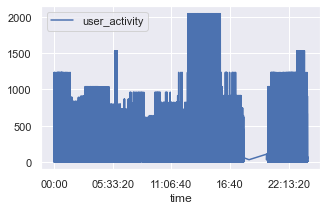

In [135]:
# observe user activity during a day, you can see user is active with more activity in app from around 12:00 to 16:00
pro_5_t5.plot('time' , 'user_activity')

#### 2. Visualize each interface language users daily activity pattern onto a single plot. 

In [136]:
# hint: use rolling window here
# Type you answer below 
dt.datetime.fromtimestamp(pro_5.timestamp.min())

datetime.datetime(2013, 2, 28, 12, 28, 1)

#### hint: result plot would look like this
![image.png](attachment:image.png)

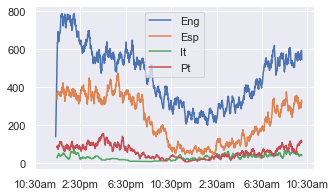

In [138]:
win = 10 ## set the window as 10 min
hours = 60
plt.plot(pd.Series(np.round((pro_5[pro_5.ui_language == 'en'].timestamp - pro_5.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((pro_5[pro_5.ui_language == 'es'].timestamp - pro_5.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((pro_5[pro_5.ui_language == 'it'].timestamp - pro_5.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((pro_5[pro_5.ui_language == 'pt'].timestamp - pro_5.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.legend(['Eng','Esp','It','Pt'])
plt.xticks([0,4*hours,8*hours,12*hours,16*hours,20*hours,24*hours],['10:30am','2:30pm','6:30pm','10:30pm','2:30am','6:30am','10:30am'])
plt.show()